<a href="https://colab.research.google.com/github/ratneshgujarathi/Authencation-with-keylogger-keystrokesdynamics/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
%matplotlib inline
plt.style.use("fivethirtyeight")

In [ ]:
# load the data
data = pd.read_csv("DSL-StrongPasswordData.csv", header = 0)
data.head()

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,DD.e.five,UD.e.five,H.five,DD.five.Shift.r,UD.five.Shift.r,H.Shift.r,DD.Shift.r.o,UD.Shift.r.o,H.o,DD.o.a,UD.o.a,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,0.2212,0.1043,0.1417,1.1885,1.0468,0.1146,1.6055,1.4909,0.1067,0.7590,0.6523,0.1016,0.2136,0.1120,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,0.1357,0.0449,0.0829,1.1970,1.1141,0.0689,0.7822,0.7133,0.1570,0.7877,0.6307,0.1066,0.1684,0.0618,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,0.1542,0.0721,0.0808,1.0408,0.9600,0.0892,0.6203,0.5311,0.1454,0.7195,0.5741,0.1365,0.2931,0.1566,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,0.2038,0.0998,0.0900,1.0556,0.9656,0.0913,1.2564,1.1651,0.1454,0.7550,0.6096,0.0956,0.1530,0.0574,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,0.1589,0.0686,0.0805,0.8629,0.7824,0.0742,0.8955,0.8213,0.1243,0.7632,0.6389,0.0430,0.1975,0.1545,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


In [ ]:
# load the data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/keystroke dynamics/DSL-StrongPasswordData.csv", header = 0)
# reset to index
data = data.reset_index()
data.head()

,index,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,DD.e.five,UD.e.five,H.five,DD.five.Shift.r,UD.five.Shift.r,H.Shift.r,DD.Shift.r.o,UD.Shift.r.o,H.o,DD.o.a,UD.o.a,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,0.2212,0.1043,0.1417,1.1885,1.0468,0.1146,1.6055,1.4909,0.1067,0.7590,0.6523,0.1016,0.2136,0.1120,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,0.1357,0.0449,0.0829,1.1970,1.1141,0.0689,0.7822,0.7133,0.1570,0.7877,0.6307,0.1066,0.1684,0.0618,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,0.1542,0.0721,0.0808,1.0408,0.9600,0.0892,0.6203,0.5311,0.1454,0.7195,0.5741,0.1365,0.2931,0.1566,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,0.2038,0.0998,0.0900,1.0556,0.9656,0.0913,1.2564,1.1651,0.1454,0.7550,0.6096,0.0956,0.1530,0.0574,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,0.1589,0.0686,0.0805,0.8629,0.7824,0.0742,0.8955,0.8213,0.1243,0.7632,0.6389,0.0430,0.1975,0.1545,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            20400 non-null  int64  
 1   subject          20400 non-null  object 
 2   sessionIndex     20400 non-null  int64  
 3   rep              20400 non-null  int64  
 4   H.period         20400 non-null  float64
 5   DD.period.t      20400 non-null  float64
 6   UD.period.t      20400 non-null  float64
 7   H.t              20400 non-null  float64
 8   DD.t.i           20400 non-null  float64
 9   UD.t.i           20400 non-null  float64
 10  H.i              20400 non-null  float64
 11  DD.i.e           20400 non-null  float64
 12  UD.i.e           20400 non-null  float64
 13  H.e              20400 non-null  float64
 14  DD.e.five        20400 non-null  float64
 15  UD.e.five        20400 non-null  float64
 16  H.five           20400 non-null  float64
 17  DD.five.Shif

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
index,20400.0,10199.500000,5889.117082,0.0000,5099.750000,10199.50000,15299.250000,20399.0000
sessionIndex,20400.0,4.500000,2.291344,1.0000,2.750000,4.50000,6.250000,8.0000
rep,20400.0,25.500000,14.431223,1.0000,13.000000,25.50000,38.000000,50.0000
H.period,20400.0,0.093379,0.029626,0.0014,0.074400,0.08950,0.107900,0.3761
DD.period.t,20400.0,0.264148,0.220534,0.0187,0.146900,0.20595,0.306450,12.5061
UD.period.t,20400.0,0.170769,0.226836,-0.2358,0.049800,0.10870,0.212400,12.4517
H.t,20400.0,0.085727,0.027424,0.0093,0.066000,0.08100,0.099800,0.2411
DD.t.i,20400.0,0.169085,0.123546,0.0011,0.113600,0.14040,0.183900,4.9197
UD.t.i,20400.0,0.083358,0.125755,-0.1621,0.027200,0.05780,0.096400,4.7999
H.i,20400.0,0.081565,0.026887,0.0032,0.062000,0.07710,0.096900,0.3312


In [ ]:
import missingno as mno

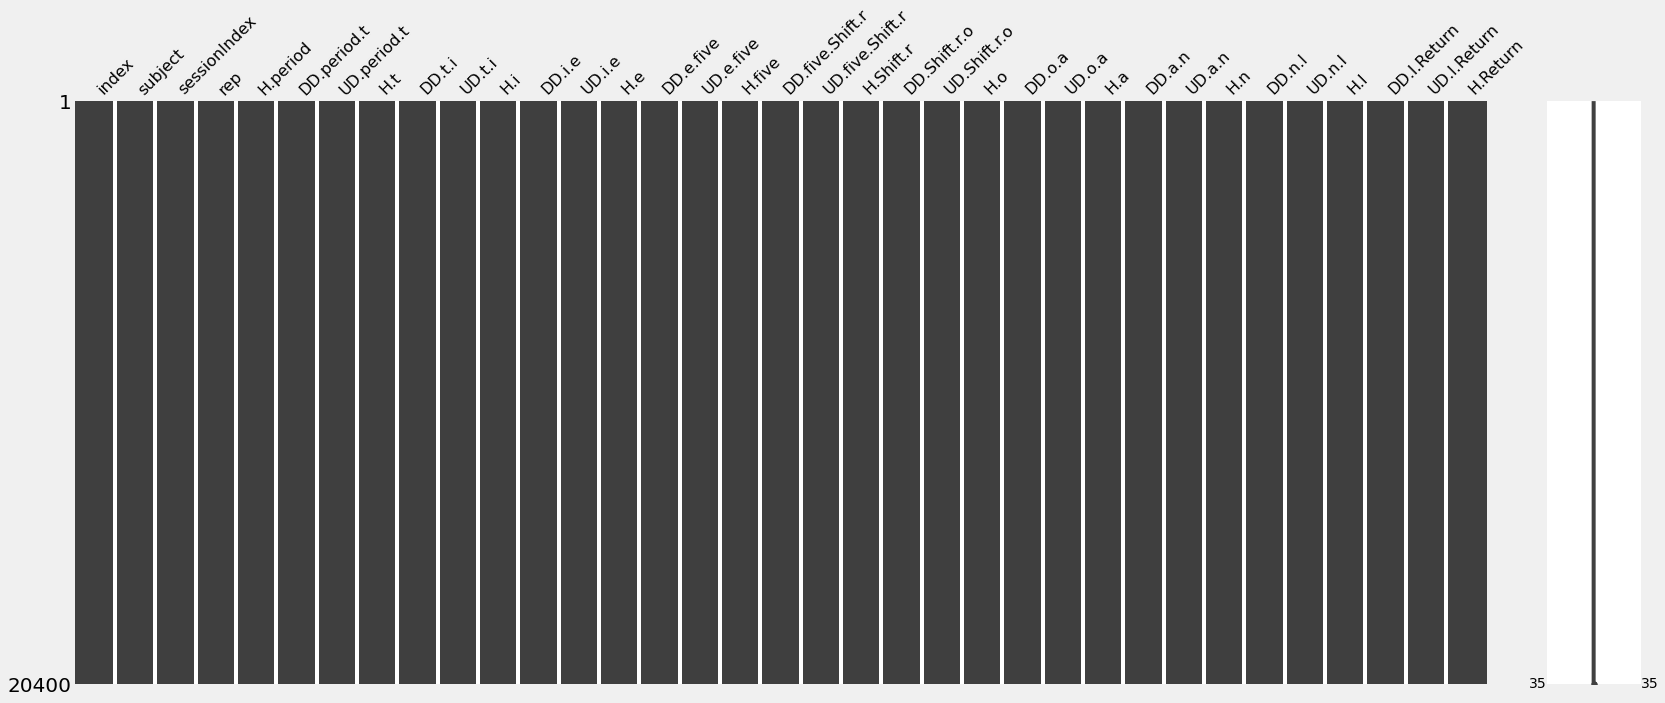

In [ ]:
mno.matrix(data)

**Data** **Visualization**

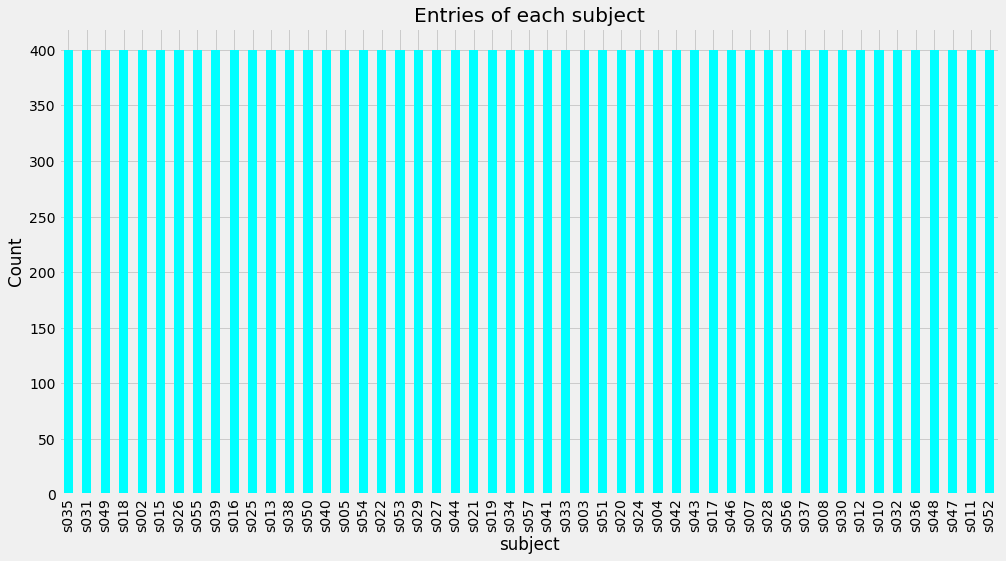

In [ ]:
plt.subplots(figsize=(15,8))

data["subject"].value_counts(normalize=True)
data['subject'].value_counts(dropna=True).plot.bar(color='cyan')
plt.title("Entries of each subject")
plt.xlabel('subject')
plt.ylabel('Count')
plt.show()
